In [2]:
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt
def bucketize(point: float, bucket_size: float) -> float:
    return bucket_size * math.floor(point / bucket_size)
def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    return Counter(bucketize(point, bucket_size) for point in points)
def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)

import random
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2
def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it
    return mid_z
def random_normal() -> float:
    return inverse_normal_cdf(random.random())

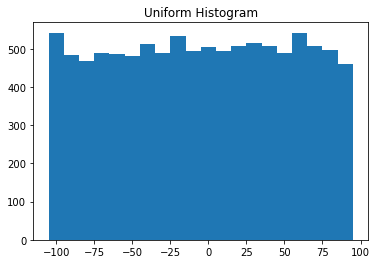

In [6]:
random.seed(0)
uniform = [200 * random.random() - 100 for _ in range(10000)]
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]
plot_histogram(uniform,10,"Uniform Histogram")

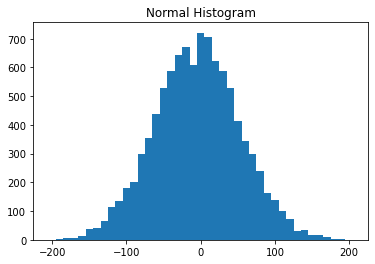

In [7]:
plot_histogram(normal,10,"Normal Histogram")

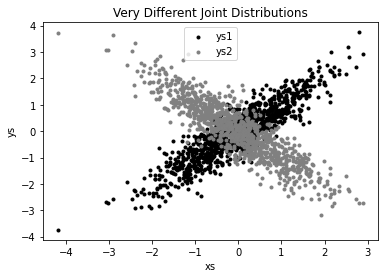

In [10]:
xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [12]:
Vector = List[float]
def dot(v: Vector, w: Vector) -> float:
    return sum(v_i * w_i for v_i, w_i in zip(v, w))
def sum_of_squares(v: Vector) -> float:
    return dot(v, v)
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)
def de_mean(xs: List[float]) -> List[float]:
    x_bar = mean(xs)
    return [x - x_bar for x in xs]
def variance(xs: List[float]) -> float:
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)
def standard_deviation(xs: List[float]) -> float:
    return math.sqrt(variance(xs))
def covariance(xs: List[float], ys: List[float]) -> float:
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)
def correlation(xs: List[float], ys: List[float]) -> float:
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero
print(correlation(xs,ys1))
print(correlation(xs,ys2))

0.9010493686379609
-0.8920981526880033


In [15]:
from typing import Callable
Vector = List[float]
Matrix = List[List[float]]
def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    return [[entry_fn(i, j)             # given i, create a list
             for j in range(num_cols)]  #   [entry_fn(i, 0), ... ]
            for i in range(num_rows)]   # create one list for each i
def correlation_matrix(data: List[Vector]) -> Matrix:
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])
    return make_matrix(len(data), len(data), correlation_ij)

vectors = [xs, ys1, ys2]
assert correlation_matrix(vectors) == [
    [correlation(xs,  xs), correlation(xs,  ys1), correlation(xs,  ys2)],
    [correlation(ys1, xs), correlation(ys1, ys1), correlation(ys1, ys2)],
    [correlation(ys2, xs), correlation(ys2, ys1), correlation(ys2, ys2)],
]

In [16]:
import datetime
stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}

In [17]:
prices: Dict[datetime.date, float] = {}

In [18]:
from typing import NamedTuple
class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

In [19]:
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)
assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [20]:
from dataclasses import dataclass
@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float
    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)
assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [25]:
from typing import Optional
import re
from dateutil.parser import parse
import csv

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row
    if not re.match(r"^[A-Z]+$", symbol):
        return None
    try:
        date = parse(date_).date()
    except ValueError:
        return None
    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None
    return StockPrice(symbol, date, closing_price)

with open("./data/03/stocks.csv", "r") as f:
    reader = csv.DictReader(f)
    rows = [[row['Symbol'], row['Date'], row['Close']]
            for row in reader]
maybe_data = [try_parse_row(row) for row in rows]

In [29]:
import tqdm
for i in tqdm.tqdm(range(100)):
    # 任意時間がかかる処理
    _ = [random.random() for _ in range(1000000)]

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.13it/s]
